In [ ]:
!pip install ultralytics # 

In [10]:
import os
import torch
from ultralytics import YOLO
from IPython.display import Image, display

## Load Trained Model and Run Inference

Load the best weights from the completed training run and prepare for inference.

In [8]:
# --- d Model ---

model_trained = None # Initialize variable
TRAINING_SUCCESS = True
results_dir = "runs/detect/helmet_train5"

# Only proceed if training seemed to complete and results were saved
if TRAINING_SUCCESS and results_dir:
    # Path to the trained model weights
    TRAINED_MODEL_PATH = os.path.join(results_dir, 'weights/best.pt')

    # Check if the trained model file exists
    if not os.path.exists(TRAINED_MODEL_PATH):
        print(f"Error: Trained model not found at {TRAINED_MODEL_PATH}")
        print("Cannot proceed with inference.")
    else:
        # Load the trained model
        print(f"Loading trained model from {TRAINED_MODEL_PATH}")
        try:
            model_trained = YOLO(TRAINED_MODEL_PATH)
            print("Trained model loaded successfully.")
        except Exception as e:
            print(f"An error occurred during trained model loading: {e}")
            model_trained = None # Ensure it's None if loading failed
else:
    print(
        "Skipping trained model loading because training did not complete successfully "
        "or results directory is unknown."
    )

### Inference on an Image

Use the loaded trained model to run prediction on a sample image.

**Important:** You need to change the `IMAGE_TO_PREDICT` variable in the next cell to the path of an actual image file you want to test.


Running inference on: dataset/test/images/-5-_png_jpg.rf.edf2c1e85be2ab356d95de9f5dac5391.jpg
Using MPS (Apple Silicon) device

image 1/1 /Users/sam/HKBU_HDDS_YR2_HW/HDDS2302_Applied Deep Learning_Final/project-py/dataset/test/images/-5-_png_jpg.rf.edf2c1e85be2ab356d95de9f5dac5391.jpg: 640x640 2 helmets, 15.7ms
Speed: 7.5ms preprocess, 15.7ms inference, 47.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
Prediction results saved.

Displaying Prediction Result:


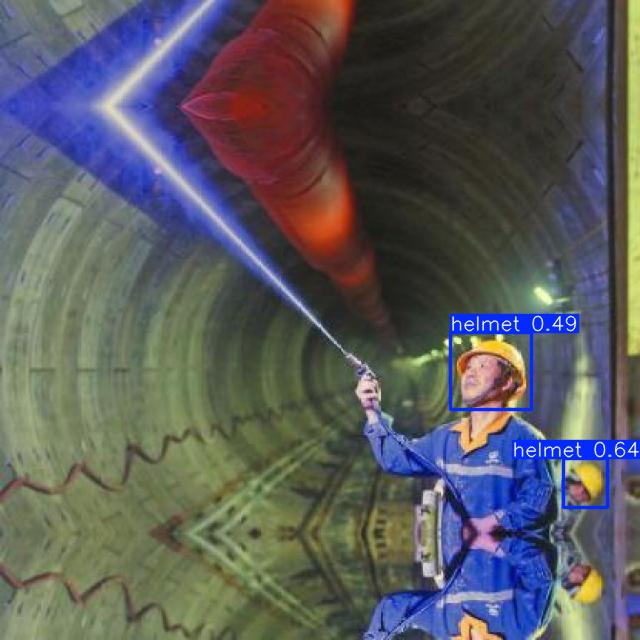

In [19]:
# --- Inference on an Image ---

# <<< CHANGE THIS TO YOUR IMAGE PATH >>>
IMAGE_TO_PREDICT = 'dataset/test/images/-5-_png_jpg.rf.edf2c1e85be2ab356d95de9f5dac5391.jpg'

if model_trained: # Check if the trained model was loaded successfully
    if not os.path.exists(IMAGE_TO_PREDICT):
        print(f"\nWarning: Test image not found at {IMAGE_TO_PREDICT}")
        print("Skipping image inference. "
              "Please edit the IMAGE_TO_PREDICT variable above with a valid path.")
    else:
        print(f"\nRunning inference on: {IMAGE_TO_PREDICT}")
        try:
            # Detect available device
            if torch.backends.mps.is_available():
                device = 'mps'
                print("Using MPS (Apple Silicon) device")
            elif torch.cuda.is_available():
                device = 'cuda'
                print("Using CUDA device")
            else:
                device = 'cpu'
                print("Using CPU device")


            # Run inference
            # Specify device='mps' for inference too, if desired
            predict_results = model_trained.predict(
                source=IMAGE_TO_PREDICT,
                save=True,      # Save image with bounding boxes
                conf=0.1,       # Optional: set confidence threshold
                device=device,
            )
            # Results are saved in `runs/detect/predict*` directory relative to notebook
            print("Prediction results saved.")

            # Optional: Display the saved prediction image
            # Find the latest prediction directory
            predict_save_dir = predict_results[0].save_dir
            img_base_name = os.path.basename(IMAGE_TO_PREDICT)
            predicted_image_path = os.path.join(predict_save_dir, img_base_name)

            if os.path.exists(predicted_image_path):
                print("\nDisplaying Prediction Result:")
                display(Image(filename=predicted_image_path))
            else:
                 print(f"Could not find saved prediction image at {predicted_image_path}")

            # Optional: Process results further if needed
            # for r in predict_results:
            #     print("Boxes detected:")
            #     print(r.boxes.data)
        except Exception as e:
            print(f"An error occurred during inference: {e}")
elif TRAINING_SUCCESS:
     print("Skipping inference because the trained model failed to load.")
else:
    print("Skipping inference because training did not complete successfully.")